In [16]:
import os
import sys
import numpy as np
import matplotlib as plt
import seaborn as sns
import h5py
import matplotlib.pyplot as plt
sys.path.append('../')
from packages import actv_analysis

In [2]:
with h5py.File('/Users/dongillee/Documents/MATLAB/AlexNet/mat files/img_set_N2to20_S4to13_1000inst.mat', 'r') as file:
    # This will print all the available keys:
    for key in file.keys():
        print(key)
        
    # Replace 'your_key' with the appropriate key you are interested in:
    data = file['img_set'][:]

img_set


In [18]:
new_data = np.transpose(data, (3, 2, 1, 0))[:,:,:,:500]

In [53]:
net=1; relu=5; epoch=0
actv_net = actv_analysis.get_actv_net(net=net, relu=relu, epoch=epoch)

--- 134.7355399131775 seconds ---


In [54]:
avg_actv_net = np.mean(actv_net, axis=2)

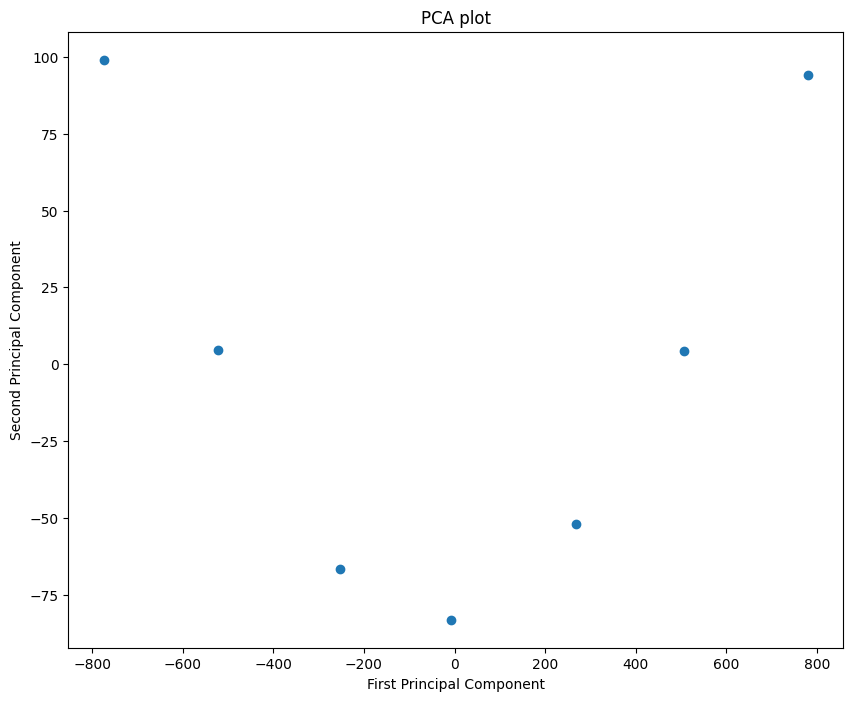

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(avg_actv_net[:,63:70].T)

# assuming pca_result is the result of your PCA transformation
x = pca_result[:, 0]  # first principal component
y = pca_result[:, 1]  # second principal component

plt.figure(figsize=(10, 8))  # Set the figure size
plt.scatter(x, y)  # create a scatter plot
plt.xlabel('First Principal Component')  # label x-axis
plt.ylabel('Second Principal Component')  # label y-axis
plt.title('PCA plot')  # set title
plt.show()  # display the plot

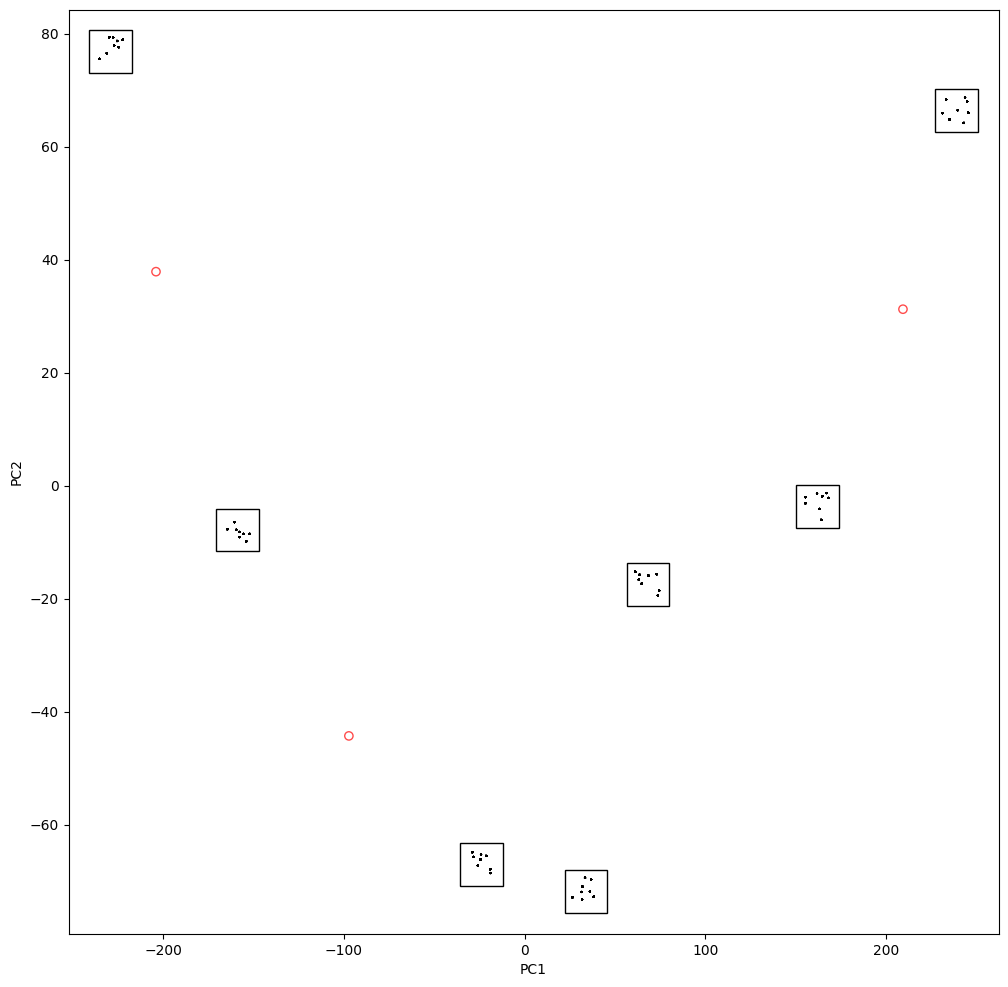

In [35]:
fig, ax = plt.subplots(figsize=(12, 12))

# Scatter plot
ax.scatter(pca_result[:, 0], pca_result[:, 1], edgecolor='r', facecolor='None', alpha=0.7)

# Get quartile ranges for both principal components
quartiles_pc1 = np.percentile(pca_result[:, 0], [25, 50, 75])
quartiles_pc2 = np.percentile(pca_result[:, 1], [25, 50, 75])

# Array to store median indices
median_indices = []

# Condition index of interest
condition_idx = 37

# Loop over PC1 quartiles
for i in range(4):
    # Get bounds of current quartile
    if i == 0:
        pc1_bounds = [-np.inf, quartiles_pc1[i]]
    elif i == 3:
        pc1_bounds = [quartiles_pc1[i-1], np.inf]
    else:
        pc1_bounds = [quartiles_pc1[i-1], quartiles_pc1[i]]
        
    # Loop over PC2 quartiles
    for j in range(4):
        # Get bounds of current quartile
        if j == 0:
            pc2_bounds = [-np.inf, quartiles_pc2[j]]
        elif j == 3:
            pc2_bounds = [quartiles_pc2[j-1], np.inf]
        else:
            pc2_bounds = [quartiles_pc2[j-1], quartiles_pc2[j]]

        # Get indices of samples in the current quartile of PC1 and PC2
        quartile_indices = np.where(
            (pca_result[:, 0] > pc1_bounds[0]) & (pca_result[:, 0] <= pc1_bounds[1]) &
            (pca_result[:, 1] > pc2_bounds[0]) & (pca_result[:, 1] <= pc2_bounds[1])
        )[0]

        # Get the index of the sample closest to the median of the current quartile of PC1 and PC2
        if quartile_indices.size != 0:  # If there's at least one sample in the current quartile
            medians = [np.median(pca_result[quartile_indices, 0]), np.median(pca_result[quartile_indices, 1])]
            median_index = quartile_indices[np.argmin(np.sum((pca_result[quartile_indices] - medians) ** 2, axis=1))]
            median_indices.append(median_index)
        
# Add images to plot
for median_index in median_indices:
    imagebox = offsetbox.AnnotationBbox(
        offsetbox.OffsetImage(new_data[:, :, condition_idx, median_index], cmap=plt.cm.gray_r, zoom=0.1),
        pca_result[median_index, :]
    )
    ax.add_artist(imagebox)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()


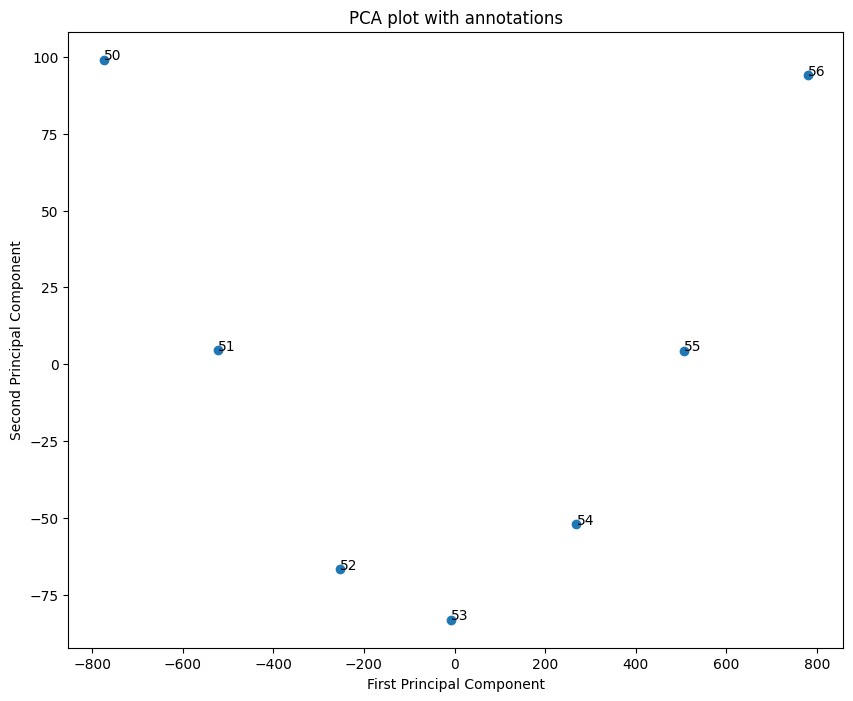

In [56]:
# assuming pca_result is the result of your PCA transformation
x = pca_result[:, 0]  # first principal component
y = pca_result[:, 1]  # second principal component

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot
ax.scatter(x, y)

# Annotating each data point with its index
for i in range(len(x)):
    ax.annotate(i+50, (x[i], y[i]))  # Add 30 to index assuming that your PCA data corresponds to indices starting at 30

ax.set_xlabel('First Principal Component')  # label x-axis
ax.set_ylabel('Second Principal Component')  # label y-axis
plt.title('PCA plot with annotations')  # set title
plt.show()  # display the plot